In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import os
for dirname, _, filenames in os.walk('./input/NASA-bearing-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./input/NASA-bearing-dataset/merged_dataset_BearingTest_2.csv


# Basic EDA

In [27]:
# Read the CSV file and set first column as the dataframe index
dataset = pd.read_csv("./input/NASA-bearing-dataset/merged_dataset_BearingTest_2.csv", index_col=0)
dataset.describe()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
count,984.000000,984.000000,984.000000,984.000000
mean,0.080905,0.078532,0.081356,0.047822
std,0.040171,0.011779,0.011596,0.009541
min,0.001168,0.000767,0.000716,0.001699
25%,0.060765,0.074233,0.076832,0.043950
50%,0.062007,0.075203,0.078197,0.044524
75%,0.083223,0.077456,0.080600,0.048111
max,0.453335,0.161016,0.151299,0.119047


In [28]:
dataset.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118


In [29]:
# The last rows shows the bearing failure (acceleration -> 0) 
dataset.tail()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-19 05:42:39,0.453335,0.161016,0.137440,0.119047
2004-02-19 05:52:39,0.337583,0.132400,0.144992,0.092125
2004-02-19 06:02:39,0.351111,0.152266,0.151299,0.100817
2004-02-19 06:12:39,0.001857,0.003732,0.003656,0.001786
2004-02-19 06:22:39,0.001168,0.000767,0.000716,0.001699


## Extract each bearing data and plot together the 4 signals

In [30]:
bearing1 = dataset['Bearing 1']
bearing1_index = bearing1.index.values
bearing2 = dataset['Bearing 2']
bearing2_index = bearing1.index.values
bearing3 = dataset['Bearing 3']
bearing3_index = bearing1.index.values
bearing4 = dataset['Bearing 4']
bearing4_index = bearing1.index.values

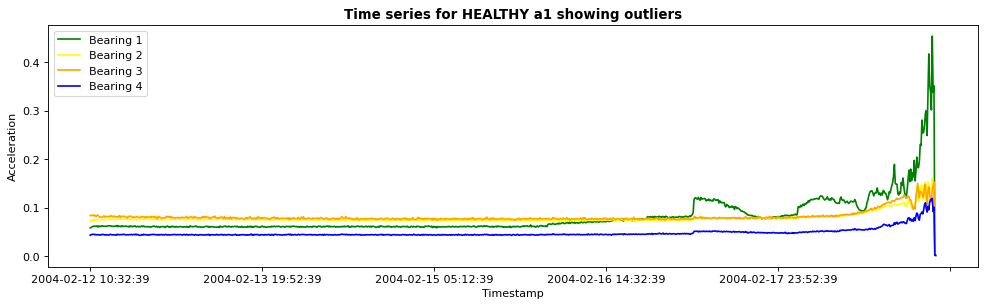

In [31]:
figure(figsize=(15, 4), dpi=80)

bearing1.plot(color='green', label='Bearing 1')
bearing2.plot(color='yellow', label='Bearing 2')
bearing3.plot(color='orange', label='Bearing 3')
bearing4.plot(color='blue', label='Bearing 4')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.legend(loc="upper left")  
plt.title('Time series for HEALTHY a1 showing outliers', fontweight ="bold")
plt.show()

# Normalize the dataset

In [32]:
from sklearn import preprocessing

# Dataset is scaled so that maximum for every column is 1
scaler = preprocessing.MinMaxScaler()
dataset_scaled = pd.DataFrame(scaler.fit_transform(dataset), 
                              columns=dataset.columns, 
                              index=dataset.index)
dataset_scaled.describe()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
count,984.000000,984.000000,984.000000,984.000000
mean,0.176344,0.485273,0.535517,0.393047
std,0.088842,0.073507,0.077007,0.081305
min,0.000000,0.000000,0.000000,0.000000
25%,0.131803,0.458450,0.505473,0.360049
50%,0.134550,0.464499,0.514541,0.364941
75%,0.181470,0.478561,0.530498,0.395511
max,1.000000,1.000000,1.000000,1.000000


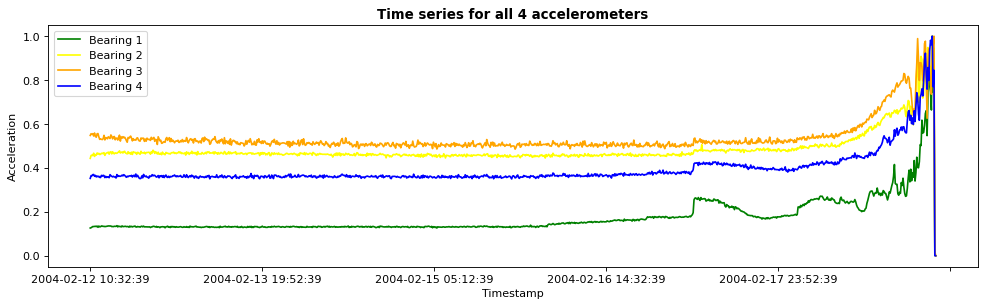

In [33]:
# Let's plot the dataset again
bearing1 = dataset_scaled['Bearing 1']
bearing1_index = bearing1.index.values
bearing2 = dataset_scaled['Bearing 2']
bearing2_index = bearing1.index.values
bearing3 = dataset_scaled['Bearing 3']
bearing3_index = bearing1.index.values
bearing4 = dataset_scaled['Bearing 4']
bearing4_index = bearing1.index.values

figure(figsize=(15, 4), dpi=80)

bearing1.plot(color='green', label='Bearing 1')
bearing2.plot(color='yellow', label='Bearing 2')
bearing3.plot(color='orange', label='Bearing 3')
bearing4.plot(color='blue', label='Bearing 4')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.legend(loc="upper left")  
plt.title('Time series for all 4 accelerometers', fontweight ="bold")
plt.show()

# PCA model: Principal Components analysis
Apply dimensionality reduction to deal with only 2 signals

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver= 'full')
dataset_PCA = pca.fit_transform(dataset_scaled)
dataset_PCA = pd.DataFrame(dataset_PCA)
dataset_PCA.index = dataset_scaled.index
dataset_PCA.columns = ['Dimension 1', 'Dimension 2']
dataset_PCA.head()

,Dimension 1,Dimension 2
2004-02-12 10:32:39,-0.061765,-0.035275
2004-02-12 10:42:39,-0.044440,-0.041943
2004-02-12 10:52:39,-0.044318,-0.038321
2004-02-12 11:02:39,-0.039493,-0.037457
2004-02-12 11:12:39,-0.039354,-0.033786


In [35]:
# Normalize PCA data
dataset_PCA = pd.DataFrame(scaler.fit_transform(dataset_PCA), 
                              columns=dataset_PCA.columns, 
                              index=dataset_PCA.index)
dataset_PCA.describe()

,Dimension 1,Dimension 2
count,984.000000,984.000000
mean,0.397396,0.409765
std,0.079498,0.070023
min,0.000000,0.000000
25%,0.364658,0.377479
50%,0.370713,0.398851
75%,0.394487,0.437157
max,1.000000,1.000000


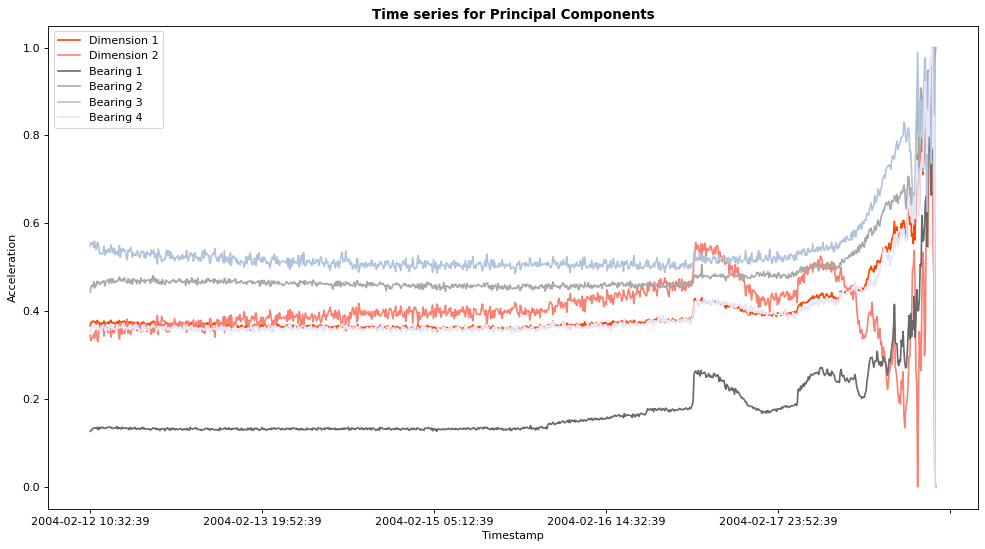

In [36]:
# Let's plot the Principal Components
dimension1 = dataset_PCA['Dimension 1']
dimension1_index = dimension1.index.values
dimension2 = dataset_PCA['Dimension 2']
dimension2_index = dimension2.index.values


figure(figsize=(15, 8), dpi=80)

dimension1.plot(color='orangered', label='Dimension 1')
dimension2.plot(color='salmon', label='Dimension 2')
bearing1.plot(color='dimgray', label='Bearing 1')
bearing2.plot(color='darkgray', label='Bearing 2')
bearing3.plot(color='lightsteelblue', label='Bearing 3')
bearing4.plot(color='lavender', label='Bearing 4')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.legend(loc="upper left")  
plt.title('Time series for Principal Components', fontweight ="bold")
plt.show()

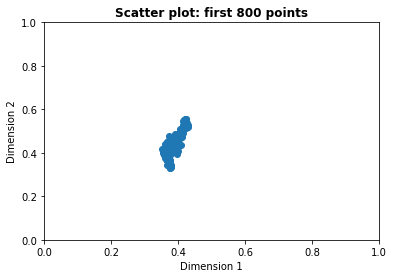

In [37]:
# VISUALIZE THE DATA IN THE PCA DIMENSIONAL SPACE
# Transform dataframe columns to np arrays
sample_size = 800
#sample_size = dimension1.shape[0] # =984
dim1_arr = np.array(dimension1)[:sample_size]
dim2_arr = np.array(dimension2)[:sample_size]
# Create a meshgrid
xx, yy = np.meshgrid(np.linspace(0, 1, 200),
                     np.linspace(0, 1, 200))
# scatter plot
plt.scatter(dim1_arr, dim2_arr)
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter plot: first 800 points', fontweight ="bold")
plt.show()

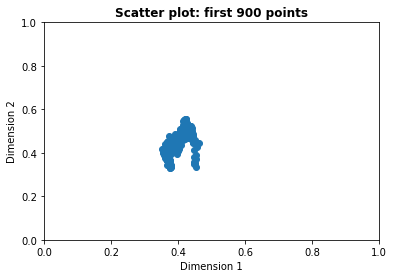

In [38]:
# Look at how the points are spreading in the index range 800-900
sample_size = 900
dim1_arr = np.array(dimension1)[:sample_size]
dim2_arr = np.array(dimension2)[:sample_size]
# Create a meshgrid
xx, yy = np.meshgrid(np.linspace(0, 1, 200),
                     np.linspace(0, 1, 200))
# scatter plot
plt.scatter(dim1_arr, dim2_arr)
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter plot: first 900 points', fontweight ="bold")
plt.show()

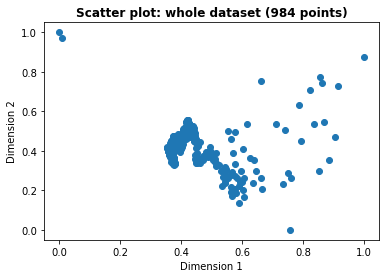

In [39]:
# Whole data (984 points)
# You can see how the dots are spreaded when approaching the bearing failure
dim1_arr = np.array(dimension1)
dim2_arr = np.array(dimension2)
# Create a meshgrid
xx, yy = np.meshgrid(np.linspace(0, 1, 200),
                     np.linspace(0, 1, 200))
# scatter plot
plt.scatter(dim1_arr, dim2_arr)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter plot: whole dataset (984 points)', fontweight ="bold")
plt.show()

# KNN Analysis

In [40]:
# Extract PCA dimension arrays
dim1_arr = np.array(dataset_PCA['Dimension 1'])
dim2_arr = np.array(dataset_PCA['Dimension 2'])

In [41]:
from pyod.models.knn import KNN 
from pyod.utils.data import get_outliers_inliers
import matplotlib.font_manager

# Setting the percentage of outliers
outlier_fraction = 0.15 # To catch all (formerly, =0.20)

# Training the classifier
clf = KNN(contamination = outlier_fraction)
clf.fit(dataset_PCA)

KNN(algorithm='auto', contamination=0.15, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

## Compute scores and threshold for labeling outliers

In [42]:
scores_pred = clf.decision_function(dataset_PCA)*-1
print ("Scores' predictions range from", "{:.4f}".format(min(scores_pred)), "to {:.4f}".format(max(scores_pred)) )

Scores' predictions range from -0.6132 to -0.0002


In [43]:
y_pred = clf.predict(dataset_PCA) # Dataset is not labeled, so this prediction cannot be used to compute any error
# !!! We're applying unsupervised learning, just look at from which index points are labeled as outliers
y_pred[-100:]

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [44]:
## We'll use y_pred to identify outliers
# Storing the outliers and inliners in different numpy arrays
X_outliers, X_inliers = get_outliers_inliers(np.array(dataset_PCA), y_pred)
n_inliers = len(X_inliers)
n_outliers = len(X_outliers)
print("There are", n_inliers, "inliers and", n_outliers, "outliers")

There are 851 inliers and 133 outliers


In [45]:
# threshold value to consider a
# datapoint inlier or outlier
threshold = stats.scoreatpercentile(scores_pred, 100 * outlier_fraction)
print ("Threshold value to label outliers is" , "{:.4f}".format(threshold) )

Threshold value to label outliers is -0.0072


## Scatter plot of outliers

In [46]:
# decision function calculates the raw 
# anomaly score for every point
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)

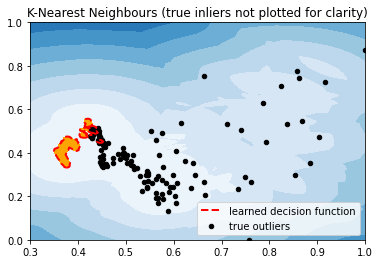

In [47]:
# fill blue colormap from minimum anomaly
# score to threshold value
subplot = plt.subplot(1, 1, 1)
subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), 
                  threshold, 10), cmap = plt.cm.Blues_r)

# draw red contour line where anomaly 
# score is equal to threshold
a = subplot.contour(xx, yy, Z, levels =[threshold],
                     linewidths = 2, colors ='red')

# fill orange contour lines where range of anomaly
# score is from threshold to maximum anomaly score
subplot.contourf(xx, yy, Z, levels =[threshold, Z.max()], colors ='orange')
  
# scatter plot of inliers with white dots
#b = subplot.scatter(dim1_arr[:-n_outliers], dim2_arr[:-n_outliers],
#                                    c ='white', s = 20, edgecolor ='k') 
  
# scatter plot of outliers with black dots
c = subplot.scatter(dim1_arr[-n_outliers:], dim2_arr[-n_outliers:], 
                                    c ='black', s = 20, edgecolor ='k')
subplot.axis('tight')

#   [a.collections[0], b, c],
#   ['learned decision function', 'true inliers', 'true outliers'],
subplot.legend(
    [a.collections[0], c],
    ['learned decision function', 'true outliers'],
    prop = matplotlib.font_manager.FontProperties(size = 10),
    loc ='lower right')
  
subplot.set_title('K-Nearest Neighbours (true inliers not plotted for clarity)')
subplot.set_xlim((0.3, 1))
subplot.set_ylim((0, 1))
plt.show() 

## Time series plot highlighting outliers

In [48]:
dataset_PCA['outlier'] = y_pred
dataset_PCA_outliers = dataset_PCA[ dataset_PCA['outlier']==1 ]

dimension1_outliers = dataset_PCA_outliers['Dimension 1']
dimension2_outliers = dataset_PCA_outliers['Dimension 2']

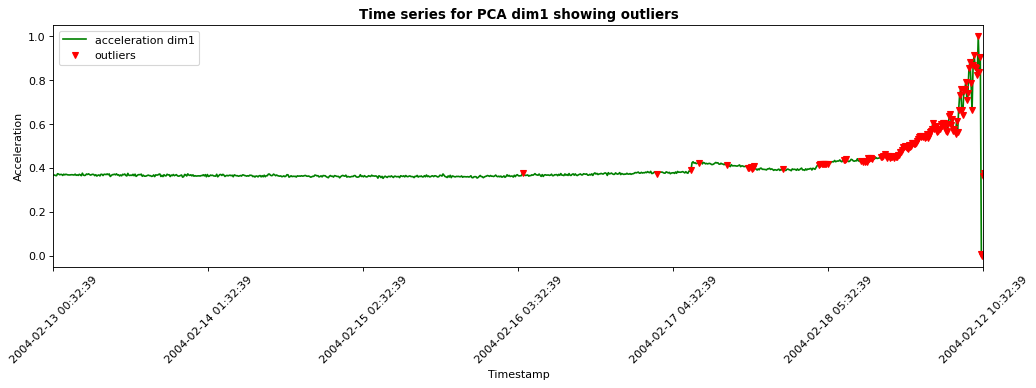

In [49]:
figure(figsize=(15, 4), dpi=80)

tail_size    = 900
x_ticks_span = 150

dim1_arr = dimension1[-tail_size:]
dim1_arr_index = dataset_PCA.index[-tail_size:]

plt.plot(dim1_arr_index, dim1_arr, color='green', label='acceleration dim1')
# https://www.tutorialspoint.com/numpy/numpy_matplotlib.htm
plt.plot(dimension1_outliers.index, dimension1_outliers, 'v', color='red', label='outliers')

plt.xlabel('Timestamp')
plt.xlim(0,tail_size)
plt.xticks(np.arange(0, tail_size+1, x_ticks_span), fontsize=10, rotation = 45)
plt.ylabel('Acceleration')

plt.legend(loc="upper left")  
plt.title('Time series for PCA dim1 showing outliers', fontweight ="bold")
plt.show()

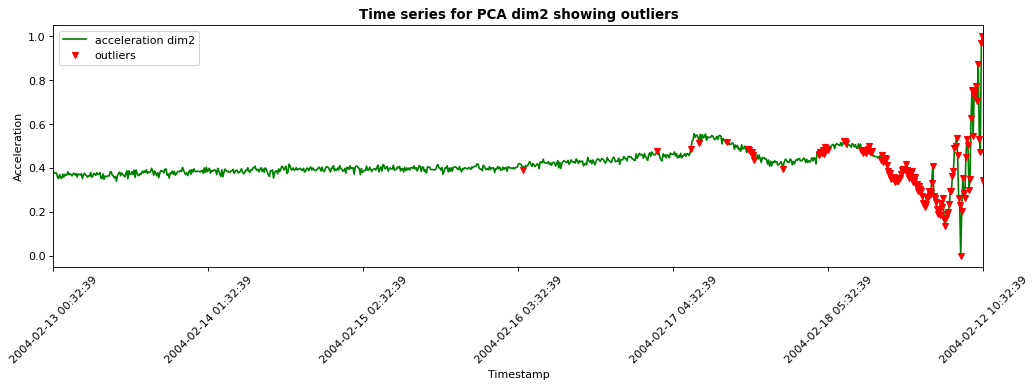

In [50]:
figure(figsize=(15, 4), dpi=80)

tail_size    = 900
x_ticks_span = 150

dim2_arr = dimension2[-tail_size:]
dim2_arr_index = dataset_PCA.index[-tail_size:]

plt.plot(dim2_arr_index, dim2_arr, color='green', label='acceleration dim2')
# https://www.tutorialspoint.com/numpy/numpy_matplotlib.htm
plt.plot(dimension2_outliers.index, dimension2_outliers, 'v', color='red', label='outliers')

plt.xlabel('Timestamp')
plt.xlim(0,tail_size)
plt.xticks(np.arange(0, tail_size+1, x_ticks_span), fontsize=10, rotation = 45)
plt.ylabel('Acceleration')

plt.legend(loc="upper left")  
plt.title('Time series for PCA dim2 showing outliers', fontweight ="bold")
plt.show()

#### We had to manually select outlier_fraction=0.15 to detects outliers in dim2
Failure is predicted to happen 2 days after detecting (non-isolated) outliers